# Regrid pft output to grids per variable and pft (intermediate postprocessing step) 


(c) Inne Vanderkelen - October 2023

## 1. Settings

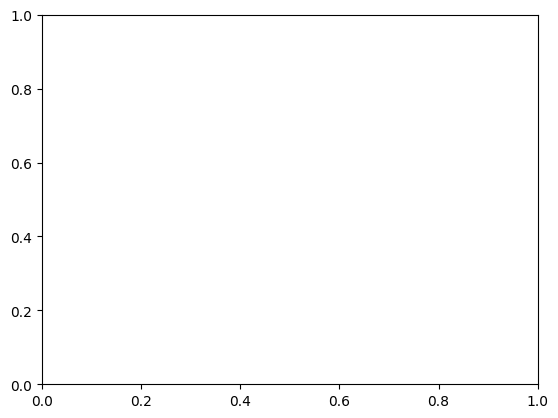

In [1]:
# laod modules 
import xarray as xr
import matplotlib.pyplot as plt
import os
import regionmask 

# import own utils module
from iv_utils_daint import *
from ctsm_py.utils import * #info on ctsm utils: https://github.com/NCAR/ctsm_python_gllery 

# do plotting settings
set_plot_param()

# ignore all runtime warnings
warnings.filterwarnings('ignore')

In [2]:
# directory settings

# set directories
outdir = '/scratch/snx3000/ivanderk/'

# Define directory where processing is done 
procdir =  outdir + 'processing_4p1000/' 

# go to processing directory 
os.chdir(procdir)

In [3]:
# case settings

# define scenario
scenario = 'medium'

# case settings
case_ctl = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.CTL.spunup2'
case_scen = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.'+scenario+'.spunup2'

case   = case_ctl
block  = 'lnd' 
stream = 'h1' 

# List of variables to import from file(s) in $indir matching $pattern.
variables = ['H2OSOI',"TOTSOILLIQ","TOTSOILICE", "QINFL" ,"QOVER", "QDRAI", 'EFLX_LH_TOT',  "watsat","QROOTSINK" ,"QVEGE", "QVEGT","QSOIL",
             "watfc",  "SMP",  "patches1d_itype_veg"]

# discard 2004 until 2008 as spin up years
start_year, end_year = 1995, 2014 # 2028 

time_slice = slice(str(start_year)+"-01-01", str(end_year)+"-12-31")

In [4]:
# get pfts modelled - bare soil, grassland and crop pfts
pft_list = [0,12,13,14,15,16]

In [5]:
# calculate saturated fraction
def calc_and_safe_saturated_fraction(pft_list, case): 
    for pft_int in pft_list: 

        print('processing pft '+str(pft_int))

        da_h2soi = load_da_gridded_pft('H2OSOI', pft_int, case).rename('H2OSOI').rename({'ivt_str':'pft'})
        da_watsat = load_da_gridded_pft('watsat', pft_int, case)
        da_watsat = da_watsat.rename('watsat').rename({'ivt_str':'pft'}).rename({'levgrnd':'levsoi'}).isel(levsoi=range(0,20))

        da_satfrac = (da_h2soi/da_watsat).rename('satfrac').assign_attrs({'units':'-','long_name':'saturated fraction'})

        del da_watsat, da_h2soi

        ds_gridded = xr.Dataset()

        ds_gridded['satfrac_'+str(pft_int)] = da_satfrac

        ds_gridded.to_netcdf(procdir+'/postprocessing/pft_gridding/'+'satfrac'+'_'+str(pft_int)+'.'+case+'.nc')

        del ds_gridded    

In [6]:
##### get pfts modelled - bare soil, grassland and crop pfts
pft_list = [15]

## Regrid control case

In [14]:
%%time
ds_ctl = import_case(case_ctl, myVars=variables,  myVegtypes=pft_list, timeSlice=time_slice, stream=stream, alter_lons=False)


CPU times: user 1min 37s, sys: 27.1 s, total: 2min 4s
Wall time: 2min 42s


In [15]:
%%time
grid_multiple_pfts_multiple_vars(ds_ctl, variables,  pft_list, case_ctl)

processing variable H2OSOI
processing pft 13
processing pft 14
processing variable TOTSOILLIQ
processing pft 13
processing pft 14
processing variable TOTSOILICE
processing pft 13
processing pft 14
processing variable QINFL
processing pft 13
processing pft 14
processing variable QOVER
processing pft 13
processing pft 14
processing variable QDRAI
processing pft 13
processing pft 14
processing variable EFLX_LH_TOT
processing pft 13
processing pft 14
processing variable watsat
processing pft 13
processing pft 14
processing variable QROOTSINK
processing pft 13
processing pft 14
processing variable QVEGE
processing pft 13
processing pft 14
processing variable QVEGT
processing pft 13
processing pft 14
processing variable QSOIL
processing pft 13
processing pft 14
processing variable watfc
processing pft 13
processing pft 14
processing variable SMP
processing pft 13
processing pft 14
processing variable patches1d_itype_veg
processing pft 13
processing pft 14
CPU times: user 11min 17s, sys: 7min

In [16]:
%%time

# calculate and safe saturated fraction
calc_and_safe_saturated_fraction(pft_list, case_ctl)

processing pft 13
processing pft 14
CPU times: user 7.43 s, sys: 1min 10s, total: 1min 18s
Wall time: 2min 22s


## Regrid scenario case

In [10]:
%%time
variables = ['SOILLIQ']
ds_scen = import_case(case_scen, myVars=variables,  myVegtypes=pft_list, timeSlice=time_slice, stream=stream, alter_lons=False)

CPU times: user 24.6 s, sys: 1.47 s, total: 26.1 s
Wall time: 40.2 s


In [8]:
%%time
grid_multiple_pfts_multiple_vars(ds_scen, variables,  pft_list, case_scen)

processing variable H2OSOI
processing pft 15
/scratch/snx3000/ivanderk/processing_4p1000//postprocessing/pft_gridding/H2OSOI_15.IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.medium.spunup2.nc
processing variable TOTSOILLIQ
processing pft 15
/scratch/snx3000/ivanderk/processing_4p1000//postprocessing/pft_gridding/TOTSOILLIQ_15.IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.medium.spunup2.nc
processing variable TOTSOILICE
processing pft 15
/scratch/snx3000/ivanderk/processing_4p1000//postprocessing/pft_gridding/TOTSOILICE_15.IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.medium.spunup2.nc
processing variable QINFL
processing pft 15
/scratch/snx3000/ivanderk/processing_4p1000//postprocessing/pft_gridding/QINFL_15.IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.medium.spunup2.nc
processing variable QOVER
processing pft 15
/scratch/snx3000/ivanderk/processing_4p1000//postprocessing/pft_gridding/QOVER_15.IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.medium.spunup2.nc
processing variable QDRAI
processing pft 15
/scratch/snx3000/iv

In [9]:
%%time

# calculate and safe saturated fraction
calc_and_safe_saturated_fraction(pft_list, case_scen)

processing pft 15
CPU times: user 2.75 s, sys: 26.2 s, total: 28.9 s
Wall time: 39.9 s


## calculate and save grassland (combining C3 and C4 grasses) 

In [10]:
# input data
# define variables to load from input dataset
input_variables = ['PFTDATA_MASK','PCT_NAT_PFT']

# load inputdata
ds_input, ds_input_scen, landmask = load_inputdata(scenario, input_variables, case_ctl)

da_pct13 = ds_input['PCT_NAT_PFT'].sel(natpft=13)
da_pct14 = ds_input['PCT_NAT_PFT'].sel(natpft=14)


weights_pft13 = da_pct13/(da_pct13+da_pct14)
weights_pft14 = da_pct14/(da_pct13+da_pct14)


In [9]:
# conbine grass PFTs and save into file
def combine_c3_c4_grassland_1_pft(case,variables):

    pft_list = [13,14]

    pft_grassland = 100 # new pft for combined c3 adn c4 grasses. 

    for variable in variables: 
        print(variable)
        list_da_pft = []

        for pft_int in pft_list: 

            list_da_pft.append(load_da_gridded_pft(variable, pft_int, case).rename(variable))

        da_pft13_weighted = (list_da_pft[0].squeeze() * weights_pft13 )
        da_pft14_weighted = (list_da_pft[1].squeeze() * weights_pft14 )
        ds_weighted = xr.concat([da_pft13_weighted, da_pft14_weighted], dim='natpft')
        da_ctl_grassland = ds_weighted.sum(dim='natpft').where(landmask)
        ds_gridded = xr.Dataset()

        ds_gridded[variable+'_'+str(pft_grassland)] = da_ctl_grassland
      
        ds_gridded.to_netcdf(procdir+'/postprocessing/pft_gridding/'+variable+'_'+str(pft_grassland)+'.'+case+'.nc')

In [7]:
variables = ["TOTSOILLIQ", "QINFL" , "QOVER", "QDRAI", 'EFLX_LH_TOT',  "QVEGE", "QVEGT","QSOIL"]

In [ ]:
combine_c3_c4_grassland_1_pft(case_scen,variables)


In [12]:
combine_c3_c4_grassland_1_pft(case_ctl,variables)


TOTSOILLIQ
QINFL
QOVER
QDRAI
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL


In [7]:
# conbine grass PFTs and save into file
def combine_c3_c4_grassland_1_pft_3dtimmean(case,variables):

    pft_list = [13,14]

    pft_grassland = 100 # new pft for combined c3 adn c4 grasses. 

    for variable in variables: 
        print(variable)
        list_da_pft = []

        for pft_int in pft_list: 

            list_da_pft.append(load_da_gridded_pft(variable, pft_int, case).rename(variable).mean('time'))

        da_pft13_weighted = (list_da_pft[0].squeeze() * weights_pft13 )
        da_pft14_weighted = (list_da_pft[1].squeeze() * weights_pft14 )
        ds_weighted = xr.concat([da_pft13_weighted, da_pft14_weighted], dim='natpft')
        da_ctl_grassland = ds_weighted.sum(dim='natpft').where(landmask)
        ds_gridded = xr.Dataset()

        ds_gridded[variable+'_'+str(pft_grassland)] = da_ctl_grassland.compute()
      
        ds_gridded.to_netcdf(procdir+'/postprocessing/pft_gridding/'+variable+'_'+str(pft_grassland)+'.'+case+'.nc')

In [7]:
# conbine grass PFTs and save into file
def combine_c3_c4_grassland_1_pft_3dseasmean(case,variables):

    pft_list = [13,14]

    pft_grassland = 100 # new pft for combined c3 adn c4 grasses. 

    for variable in variables: 
        print(variable)
        list_da_pft = []

        for pft_int in pft_list: 

            list_da_pft.append(load_da_gridded_pft(variable, pft_int, case).rename(variable).groupby('time.month').mean())

        da_pft13_weighted = (list_da_pft[0].squeeze() * weights_pft13 )
        da_pft14_weighted = (list_da_pft[1].squeeze() * weights_pft14 )
        ds_weighted = xr.concat([da_pft13_weighted, da_pft14_weighted], dim='natpft')
        da_ctl_grassland = ds_weighted.sum(dim='natpft').where(landmask)
        ds_gridded = xr.Dataset()

        ds_gridded[variable+'_'+str(pft_grassland)] = da_ctl_grassland.compute()
      
        ds_gridded.to_netcdf(procdir+'/postprocessing/pft_gridding/'+variable+'_'+str(pft_grassland)+'.'+case+'.seasmean.nc')

In [8]:
variables = ["H2OSOI", "SMP" , "QROOTSINK"]

In [11]:
combine_c3_c4_grassland_1_pft_3dtimmean(case_scen,variables)


H2OSOI
SMP
QROOTSINK


In [12]:
combine_c3_c4_grassland_1_pft_3dtimmean(case_ctl,variables)


H2OSOI
SMP
QROOTSINK
